In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("../../../../data/suicide_rates.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
#df.loc[df['country'].str.startswith('U')]

CountryU = df[df['country'].apply(lambda x: x.startswith('U'))]

In [ ]:
CountryU['country'].unique()

In [ ]:
US = df.loc[df['country'].str.contains('United States')]

In [3]:
df.groupby('age')['suicides_no'].sum()

NameError: name 'df' is not defined

In [61]:
df['age'] = df['age'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null category
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 2.4+ MB


In [62]:
age = list(df['age'].cat.categories)
age.remove('5-14 years')
age = ['5-14 years'] + age

In [63]:
df['age'] = df['age'].cat.reorder_categories(age)

In [51]:
df

0    15-24 years
1    35-54 years
2    15-24 years
3      75+ years
4    25-34 years
Name: age, dtype: category
Categories (6, object): [5-14 years, 15-24 years, 25-34 years, 35-54 years, 55-74 years, 75+ years]

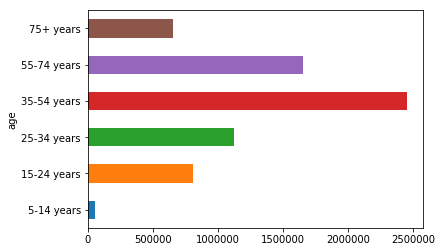

In [72]:
df.groupby('age')['suicides_no'].sum().plot(kind='barh')
plt.savefig('warm-up2_2.pdf')